<h2><b>linear regrission</b></h2>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [2]:
boston = load_boston()

In [3]:
data = pd.DataFrame(boston.data) 
data.columns = boston.feature_names 

data.head() 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
data['target'] = boston.target

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
data.shape

(506, 14)

In [7]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

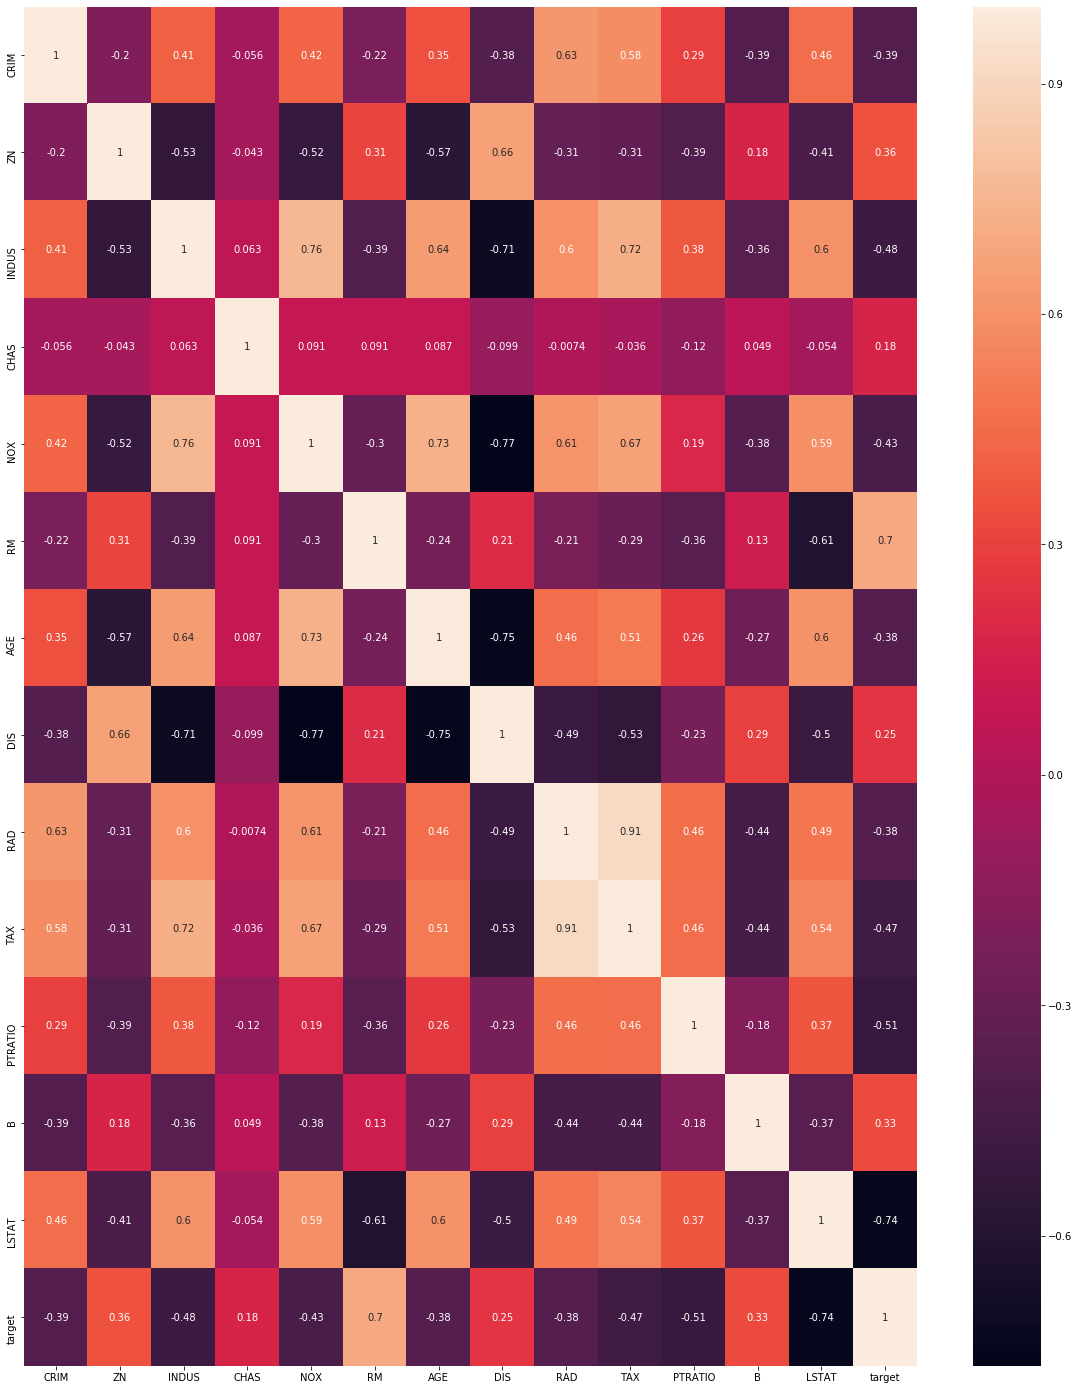

In [8]:
corr = data.corr()
plt.subplots(figsize=(20,25))
sns.heatmap(corr,annot=True)
plt.show()

In [9]:
'''da = ['INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
dataa = data[da]'''

"da = ['INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']\ndataa = data[da]"

In [10]:
x = data.drop('target',axis=1)
y = data['target']

In [11]:
x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


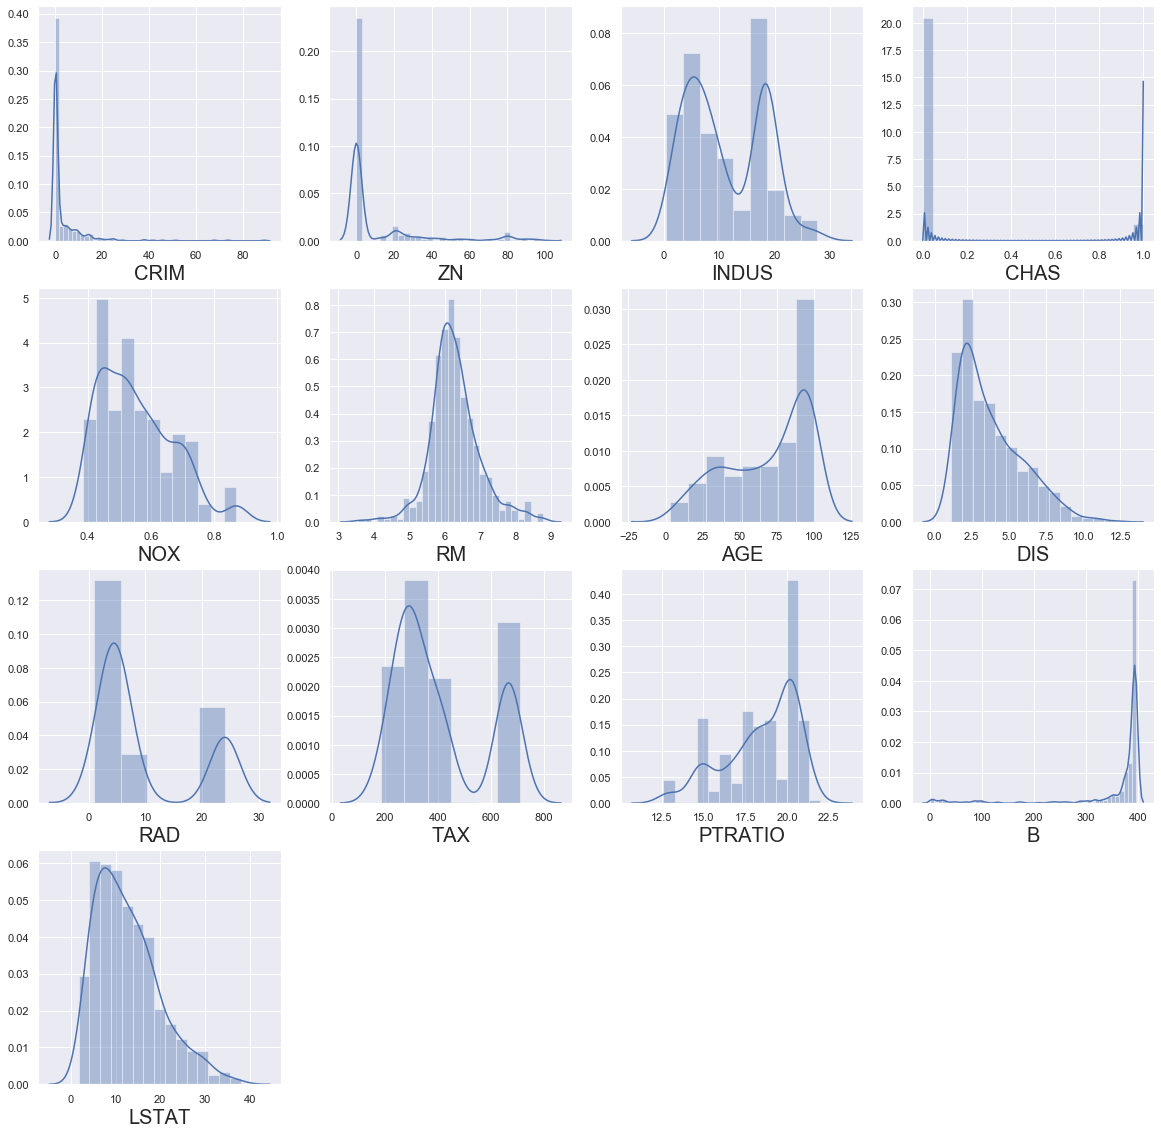

In [12]:
#plt.figure(figsize=(20,25),facecolor='while')
sns.set()
plt.figure(figsize=(20,25), facecolor='white')
pltno=1
for xa in data:
    if pltno<len(data.columns):
        plt.subplot(5,4,pltno)
        sns.distplot(data[xa])
        plt.xlabel(xa,fontsize=20)
    pltno+=1
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler


In [14]:
scalar = StandardScaler()
xscaled = scalar.fit_transform(x)

In [82]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(xscaled, y, test_size =0.35, random_state = 42) 


In [83]:
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge 

In [84]:
# Fitting Multi Linear regression model to training model 

regressor = LinearRegression() 
regressor.fit(xtrain, ytrain) 

# predicting the test set results 
y_pred = regressor.predict(xtest) 


In [85]:
y_pred

array([28.60952259, 36.85626762, 15.38876853, 25.64452724, 18.72406291,
       23.02649513, 17.22868975, 14.03971784, 22.90670254, 20.69041947,
       24.73520492, 17.96890471, -6.49207567, 21.70616258, 19.16447129,
       26.1151788 , 20.0098639 ,  5.8259821 , 40.35956964, 17.44880445,
       27.74945705, 30.41791488, 10.81978361, 24.07657703, 18.05289889,
       16.00449195, 23.29369825, 14.31869068, 22.28081994, 19.47481812,
       22.2608951 , 25.17207242, 25.15099492, 18.56351246, 16.54736404,
       17.25387612, 30.61612043, 20.23499258, 24.01263759, 25.08156765,
       14.14968964, 31.88091413, 42.5288082 , 17.71599873, 27.10637661,
       17.21118733, 13.74907678, 26.27942679, 20.22707024, 30.02474054,
       20.8262701 , 34.00026004, 15.45627088, 26.17520657, 39.17414311,
       22.97772259, 18.82705058, 33.34969341, 24.84578337, 12.58167816,
       22.31016961, 30.62312131, 31.8940865 , 16.70066786, 20.68101451,
       16.58194638, 20.25494769, 26.31564386, 31.40797733, 11.90

In [86]:
print(regressor.score(xtrain,ytrain))
print(regressor.score(xtest,ytest))

0.7418569316818882
0.7204251482114905


In [87]:
from sklearn.metrics import r2_score

print(r2_score(ytest,y_pred))

0.7204251482114905


In [21]:
regressor.coef_

array([-1.14691411,  0.83432605,  0.33940694,  0.79163612, -1.784727  ,
        2.84783949, -0.30429306, -2.91562521,  2.11140045, -1.46519951,
       -1.9696347 ,  1.07567771, -3.90310727])

In [22]:
regressor.intercept_

22.50945471291038

<h3><b>Lasso regrassion </b></h3>

In [23]:
x2 = data.drop('target',axis=1)
y2 = data['target']

scalar = StandardScaler()
xscaled = scalar.fit_transform(x2)
# splitting data to training and testing dataset. 
from sklearn.model_selection import train_test_split 
#xtrain, xtest, ytrain, ytest = train_test_split(dataa, y, test_size =0.2, random_state = 42) 
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(xscaled, y, test_size =0.3, random_state = 42) 


# predicting the test set results 




In [53]:
ls = Lasso(alpha = 0.12,max_iter=10000,random_state = 33)
ls.fit(xtrain2,ytrain2)#xtrain, xtest, ytrain

Lasso(alpha=0.12, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=33,
      selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
y_pred2 = ls.predict(xtest2)


In [55]:
from sklearn.metrics import r2_score
y_pred2 = ls.predict(xtest2)
r_score = r2_score(ytest2, y_pred2)
print("Training Score : ",rr.score(xtrain2,ytrain2))

print("Testing Score : ", r_score)

Training Score :  0.7417238809694071
Testing Score :  0.6914332601023139


<h3><b>Ridge regrassion </b></h3>

In [61]:
x3 = data.drop('target',axis=1)
y3 = data['target']

scalar = StandardScaler()
xscaled = scalar.fit_transform(x3)
# splitting data to training and testing dataset. 
from sklearn.model_selection import train_test_split 
#xtrain, xtest, ytrain, ytest = train_test_split(dataa, y, test_size =0.2, random_state = 42) 
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(xscaled, y, test_size =0.3, random_state = 42) 



In [80]:
rr = Ridge(alpha=1.0, max_iter=1000,random_state = 33)
    
rr.fit(xtrain3, ytrain3)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, random_state=33, solver='auto', tol=0.001)

In [81]:
from sklearn.metrics import r2_score

y_pred3= rr.predict(xtest3)

r_score = r2_score(ytest3, y_pred3)

print("Training Score : ",rr.score(xtrain3,ytrain3))

print("Testing Score : ", r_score)

Training Score :  0.7434821404219876
Testing Score :  0.7108092176450824
